# Exercise 2: Logistic Regression from Scratch

**Goal:**
Classify whether a student will pass based on study hours (binary classification using logistic regression).


### 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2. Create Sample Dataset

In [3]:
# Feature: hours studied
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Target: 0 = fail, 1 = pass
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

### 3. Normalize the Data (Optional but good practice)

In [4]:
X_mean = X.mean()
X_std = X.std()
X_norm = (X - X_mean) / X_std

# Bias term (intercept) is added later
X_b = np.c_[np.ones((X_norm.shape[0], 1)), X_norm]  # Add column of ones

### 4. Define Sigmoid Function

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### 5. Initialize Parameters

In [6]:
theta = np.zeros(2)  # [bias, weight]
learning_rate = 0.1
epochs = 1000
m = len(X_b)

### 6. Gradient Descent for Logistic Regression

In [7]:
for i in range(epochs):
    # Compute predictions
    z = X_b.dot(theta)  # y = bias*1 + weight*x
    h = sigmoid(z)  
    y_diff = h - y # predicted - actual
    gradients = (1/m) * X_b.T.dot(y_diff)  # Gradient calculation
    theta -= learning_rate * gradients

### 7. Prediction Function

In [13]:
def predict(X_input):
    X_input_norm = (X_input - X_mean) / X_std
    X_input_b = np.c_[np.ones((X_input_norm.shape[0], 1)), X_input_norm]  # Add bias term
    z_ = X_input_b.dot(theta)  # y = bias*1 + weight*x
    
    return sigmoid(z_) >= 0.5

### 8. Test Prediction

In [14]:
test_hours = np.array([2.5, 9.5, 8.5])

print("Predictions (pass=1, fail=0):", predict(test_hours).astype(int))

Predictions (pass=1, fail=0): [0 1 1]


### 9. Plot the Sigmoid Curve

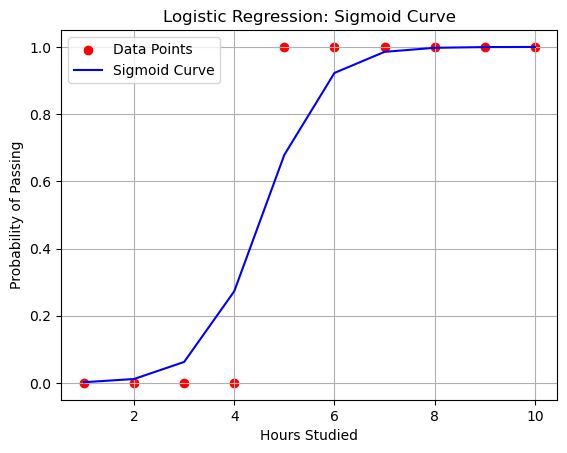

In [15]:
z = X_b.dot(theta)
h = sigmoid(z)

plt.scatter(X, y, color='red', label='Data Points')
plt.plot(X, h, color='blue', label='Sigmoid Curve')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Sigmoid Curve')
plt.legend()
plt.grid()
plt.show()

### 10. Evaluate Accuracy

In [16]:
predictions = sigmoid(X_b.dot(theta)) >= 0.5

accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


## Decision Boundary:
---

### 1. Calculate the Decision Boundary (in normalized scale)

In [17]:
boundary_norm = -theta[0] / theta[1]

'''
Decision Boundary in normalized scale:
- theta[0] = bias
- theta[1] = weight
Decision Boundary = -bias / weight

This is the point where the model predicts a 50% chance of passing.
'''

### 2. Convert to Original Scale

In [19]:
boundary = boundary_norm * X_std + X_mean
print(f"Decision Boundary (in original scale): {boundary:.2f} hours")

Decision Boundary (in original scale): 4.57 hours


### 3. Plot Decision Boundary

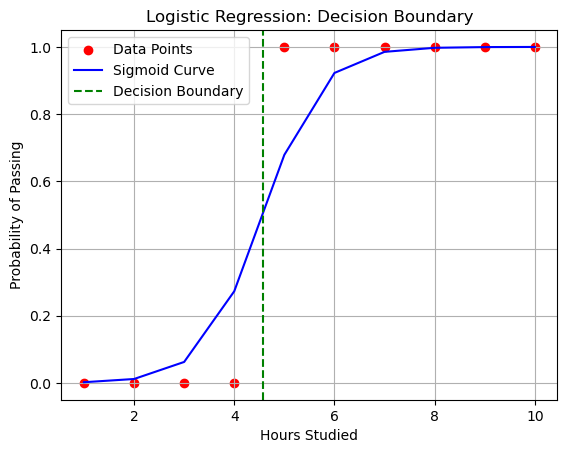

In [20]:
plt.scatter(X, y, color='red', label='Data Points')

z = X_b.dot(theta)
h = sigmoid(z)
plt.plot(X, h, color='blue', label='Sigmoid Curve')

# Mark the decision boundary
plt.axvline(x=boundary, color='green', linestyle='--', label='Decision Boundary')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Decision Boundary')
plt.legend()
plt.grid()